In [1]:
# !pip install acopy[plot]
# !sudo apt install graphviz
# !pip install networkx[all]
# !pip install numpy scipy pandas matplotlib pygraphviz pydot pyyaml gdal

In [2]:
from numpy.random import choice as np_choice
from math import inf

import matplotlib.lines as lines
import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import heapq as hq
import acopy
import time

# Типы и Структуры Данных. ЛР3

## Полный перебор (алгоритм Дейкстры)

![Alt Text](dijkstra.gif)

In [3]:
G_6 = [
    [inf,   1.0,  5.5,   52.3,  25.0,  8.8  ],
    [1.0,   inf,  2.5,   5.0,   5.0,   2.5  ],
    [5.5,   2.5,  inf,   14.3,  12.0,  33.3 ],
    [52.3,  5.0,  14.3,  inf,   5.1,   5.5  ],
    [25.0,  5.0,  12.0,  5.1,   inf,   99.9 ],
    [8.8,   2.5,  33.3,  5.5,   99.9,  inf  ],
]

In [4]:
G_8 = [
    [inf,   1.0,  5.5,   52.3,  25.0,  8.8 ,  2.0,   2.5  ],
    [1.0,   inf,  2.5,   5.0,   5.0,   2.5 ,  2.5,   2.5  ],
    [5.5,   2.5,  inf,   14.3,  12.0,  33.3,  23.0,  32.5 ],
    [52.3,  5.0,  14.3,  inf,   5.1,   5.5 ,  2.2,   3.3  ],
    [25.0,  5.0,  12.0,  5.1,   inf,   99.9,  5.0,   22.5 ],
    [8.8,   2.5,  33.3,  5.5,   99.9,  inf ,  5.0,   12.5 ],
    [2.0,   2.5,  23.0,  2.2,   5.0,   5.0,   inf,   5.0  ],
    [2.5,   2.5,  32.5,  3.3,   22.5,  12.5,  5.0,   inf  ],
]

In [5]:
def dijkstra(graph, start, goal):
    """
        Алгоритм Дейкстры, для работы с данными в формате словаря
    """
    shortest_path = {} 
    predecessor = {} 
    unseen_nodes = graph 
    infinity = inf 
    path = [] 
    for node in unseen_nodes: 
        shortest_path[node] = infinity 
    shortest_path[start] = 0 
     
    while unseen_nodes: 
        min_node = None 
        for node in unseen_nodes: 
            if min_node is None: 
                min_node = node 
            elif shortest_path[node] < shortest_path[min_node]: 
                min_node = node 
         
        for connect_node, link_cost in graph[min_node].items(): 
            if link_cost + shortest_path[min_node] < shortest_path[connect_node]: 
                shortest_path[connect_node] = link_cost + shortest_path[min_node]  
                predecessor[connect_node] = min_node 
        unseen_nodes.pop(min_node) 
     
    current_node = goal 
    while current_node != start: 
        path.insert(0,current_node) 
        current_node = predecessor[current_node] 
     
    path.insert(0,start) 
    print(f'Кратчайший путь до цели составляет {shortest_path[goal]} условных единиц меры') 
    print(f'Путь будет проходить по следующим вершинам {path}')

### кратчайший маршрут из точки N в точку M:

In [6]:
graph_6 = { 
    'A': {'B': 1.0, 'C': 5.5, 'D': 52.3, 'E': 25.0, 'F': 8.8},
    'B': {'A': 1.0, 'C': 2.5, 'D': 5.0, 'E': 5.0, 'F': 2.5},
    'C': {'A': 5.5, 'B': 2.5, 'D': 14.3, 'E': 12.0, 'F': 33.3},
    'D': {'A': 52.3, 'B': 5.0, 'C': 14.3, 'E': 5.1, 'F': 5.5},
    'E': {'A': 25.0, 'B': 5.0, 'C': 12.0, 'D': 5.1, 'F': 99.9},
    'F': {'A': 8.8, 'B': 2.5, 'C': 33.3, 'D': 5.5, 'E': 99.9},
}

dijkstra(graph_6, 'A', 'D')

Кратчайший путь до цели составляет 6.0 условных единиц меры
Путь будет проходить по следующим вершинам ['A', 'B', 'D']


In [7]:
graph_8 = {
    'A': {'B': 6, 'C': 100, 'D': 81, 'E': 23}, 
    'B': {'A': 6, 'D': 77}, 
    'C': {'A': 100}, 
    'D': {'A': 81, 'B': 77}, 
    'E': {'A': 23}, 
}

dijkstra(graph_8, 'A', 'D')

Кратчайший путь до цели составляет 81 условных единиц меры
Путь будет проходить по следующим вершинам ['A', 'D']


### перебор всех вариантов маршрутов:

In [8]:
def dijkstra_heap(G, start=0):
    """
        Алгоритм Дейкстры, реализованный,
        с помощью стандартной библиотеки heapq (очередь кучи)
        
        G - граф
        start - стартовая вершина
    """
    n = len(G)  # количество вершин
    Q = [(0, start)]  # инициализируем массив для кучи
    d = [inf for i in range(n)]  # инициализируем массив с бесконечностями
    d[start] = 0  # присваиваем 0 стартовой вершине

    while len(Q) != 0:
        (cost, u) = hq.heappop(Q)  # выбрасываем из кучи Q

        for v in range(n):
            if d[v] > d[u] + G[u][v]:  # процесс ослабления ребра
                d[v] = d[u] + G[u][v]
                hq.heappush(Q, (d[v], v))  # добавляем в кучу Q
                
    return d

In [9]:
for i in range(len(G_6)):
    print(dijkstra_heap(G_6, i))

[0, 1.0, 3.5, 6.0, 6.0, 3.5]
[1.0, 0, 2.5, 5.0, 5.0, 2.5]
[3.5, 2.5, 0, 7.5, 7.5, 5.0]
[6.0, 5.0, 7.5, 0, 5.1, 5.5]
[6.0, 5.0, 7.5, 5.1, 0, 7.5]
[3.5, 2.5, 5.0, 5.5, 7.5, 0]


In [10]:
for i in range(len(G_8)):
    print(dijkstra_heap(G_8, i))

[0, 1.0, 3.5, 4.2, 6.0, 3.5, 2.0, 2.5]
[1.0, 0, 2.5, 4.7, 5.0, 2.5, 2.5, 2.5]
[3.5, 2.5, 0, 7.2, 7.5, 5.0, 5.0, 5.0]
[4.2, 4.7, 7.2, 0, 5.1, 5.5, 2.2, 3.3]
[6.0, 5.0, 7.5, 5.1, 0, 7.5, 5.0, 7.5]
[3.5, 2.5, 5.0, 5.5, 7.5, 0, 5.0, 5.0]
[2.0, 2.5, 5.0, 2.2, 5.0, 5.0, 0, 4.5]
[2.5, 2.5, 5.0, 3.3, 7.5, 5.0, 4.5, 0]


## Муравьиный Алгоритм

![Alt Text](ants.gif)

1. Выбираем количество муравьев N.

2. Инициализируем матрицу отложений феромонов, она такой же формы, как и матрица расстояний. И координаты соответствуют одним и тем же городам. Если distances[2,5] = 35, т.е. расстояние от 2 до 5 составляет 35, и если pheromone[2,5] = 0.8, т.е. уровень феромона, отложенного на пути между 2 и 5, составляет 0,8. Матрица феромонов инициализируется небольшими переменными одного и того же значения.

3. Изучение нескольких путей:

    Муравей принимает решение, в какой город поехать, используя следующую конструкцию:
    city_to_city_score = pheromone ** alpha * (1.0 / distance) ** beta
    альфа и бета действуют как вес на феромон и расстояние соответственно.

    Мы производим расчет city_to_city_score для всех доступных городов (мы игнорируем города, которые мы уже посетили, потому что мы не можем вернуться к ним).

    Вероятность поехать в следующий город:
    prob_of_going_to_city(i) = city_to_city_score(i) / sum_of_all_available_city_to_city_scores

    Например, если муравей находится в городе 2, а доступные города - 4,7,8. Мы рассчитываем оценки для этих городов как:
    {4: 0.2, 7: 0.4, 8: 0.8}

    Вероятность перехода на 4
    0.2 / (0.2 + 0.4 + 0.8) = 0.142857
    и так далее.

    Муравей продолжает переходить из города в город в соответствии с указанным выше правилом выбора, пока не посетит все города.

    Если мы выберем для начала 20 муравьев, у нас будет 20 путей в конце этой группы муравьёв, путешествующих поколения.

    Поскольку на начальном этапе уровни феромонов одинаковы, выбор делается на расстоянии + некоторый шум. Случайный жадный, если хотите. Но мы хотим отслеживать успешные маршруты, поэтому муравьи откладывают феромон.

4. На обратном пути все муравьи или определенное количество лучших муравьев откладывают феромоны на своих тропах.

    Они вносят:

    1 / (distance between two cities)

    Например: муравей прошел путь: [(0 -> 3) (расстояние: 8), (3 -> 5) (расстояние: 2)]

    0,125 единицы феромона откладываются на 
    pheromone[0,3] += 0.125
    и
    pheromone[3,5] += 0.5

    Это сделано для того, чтобы муравьи стали уделять больше внимания более коротким маршрутам между городами.

5. И последнее: мы должны позволить феромонам распадаться(выветриваться, испаряться), чтобы старые феромоны не сбивали с толку следующие поколения муравьев. Мы просто умножаем матрицу феромонов на скорость распада. Сразу после внесения депозита. Следовательно, феромон, который некоторое время находился в сидячем состоянии, подвергался множеству многих распадов и должен быть небольшим.

6. Продолжаем выполнять шаги 3) 4) и 5) в кол-ве N итераций.

In [11]:
class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Аргументы:
            distances (2D numpy.array): Квадратная матрица расстояний, главную диагональ задаём бесконечностями.
            n_ants (int): Количество муравьев, бегущих за итерацию.
            n_best (int): Количество лучших муравьев, откладывающих феромон. (вместо Q)
            n_iteration (int): Количество итераций.
            decay (float): Коэффициент распада (испарения феромона). Значение феромона умножается на к-нт распада, поэтому 0,95 приведет к распаду, 0,5 - к гораздо более быстрому распаду.
            alpha (int or float): Влияние феромона (стадность), более высокий альфа дает феромон больший вес. По умолчанию = 1
            beta (int or float): Влияние длины пути (жадность алгоритма), чем выше бета, тем больше вес расстоянию. По умолчанию = 1
        Пример:
            ant_colony = AntColony(matrix_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    # запуск колонии
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
#             print(shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone * self.decay            
        return all_time_shortest_path

    # распространение феромона
    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))  # возвращаемся туда, где мы начали
        return path

    # выбор хода
    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

In [12]:
distances = np.array(G_6)
distances

array([[ inf,  1. ,  5.5, 52.3, 25. ,  8.8],
       [ 1. ,  inf,  2.5,  5. ,  5. ,  2.5],
       [ 5.5,  2.5,  inf, 14.3, 12. , 33.3],
       [52.3,  5. , 14.3,  inf,  5.1,  5.5],
       [25. ,  5. , 12. ,  5.1,  inf, 99.9],
       [ 8.8,  2.5, 33.3,  5.5, 99.9,  inf]])

In [13]:
ant_colony = AntColony(
    distances=distances,  # матрица расстояний
    n_ants=10,            # количество муравьёв
    n_best=10,            # количество муравьёв с феромоном
    n_iterations=10,      # количество итераций
    decay=0.95,           # количество испарения феромона
    alpha=1,              # влияние феромона
    beta=1                # влияние длины пути
)

shortest_path = ant_colony.run()
print (f"\n Оптимальный маршрут: {shortest_path[0]}")
print (f"\n Расстояние маршрута: {shortest_path[1]}")


 Оптимальный маршрут: [(0, 1), (1, 5), (5, 3), (3, 4), (4, 2), (2, 0)]

 Расстояние маршрута: 31.6


In [14]:
distances = np.array(G_8)
distances

array([[ inf,  1. ,  5.5, 52.3, 25. ,  8.8,  2. ,  2.5],
       [ 1. ,  inf,  2.5,  5. ,  5. ,  2.5,  2.5,  2.5],
       [ 5.5,  2.5,  inf, 14.3, 12. , 33.3, 23. , 32.5],
       [52.3,  5. , 14.3,  inf,  5.1,  5.5,  2.2,  3.3],
       [25. ,  5. , 12. ,  5.1,  inf, 99.9,  5. , 22.5],
       [ 8.8,  2.5, 33.3,  5.5, 99.9,  inf,  5. , 12.5],
       [ 2. ,  2.5, 23. ,  2.2,  5. ,  5. ,  inf,  5. ],
       [ 2.5,  2.5, 32.5,  3.3, 22.5, 12.5,  5. ,  inf]])

In [15]:
ant_colony = AntColony(
    distances=distances,  # матрица расстояний
    n_ants=10,            # количество муравьёв
    n_best=10,            # количество муравьёв с феромоном
    n_iterations=10,      # количество итераций
    decay=0.95,           # количество испарения феромона
    alpha=1,              # влияние феромона
    beta=1                # влияние длины пути
)

shortest_path = ant_colony.run()
print (f"\n Оптимальный маршрут: {shortest_path[0]}")
print (f"\n Расстояние маршрута: {shortest_path[1]}")


 Оптимальный маршрут: [(0, 7), (7, 3), (3, 4), (4, 2), (2, 1), (1, 5), (5, 6), (6, 0)]

 Расстояние маршрута: 34.9


In [16]:
# TODO:

In [17]:
# на этапе параметризации 3 цикла

# две матрицы, 6х6 и 8х8
# на выходе таблица, в которой есть столбцы:

# | alfa | ро/тау | tmax | L наилучшее 1 матрицы | L наилучшее 2 матрицы | L наилучшее и L эталон (для 1-й и 2-й матр)

In [18]:
# альфа - параметр влияния длины пути т.е. жадности алгоритма
# бета - влияние феромона т.е. стадности
# Q - количество феромона, переносимого муравьем
# e/ro/tau - кол-во испарения феромона

## Эксперименты с [ACOpy](https://acopy.readthedocs.io/)

### создаём граф с вершинами и весами рёбер

In [19]:
G = nx.Graph()

In [20]:
G.add_edge('A', 'B', weight=1.)
G.add_edge('A', 'C', weight=5.5)
G.add_edge('A', 'D', weight=52.3)
G.add_edge('A', 'E', weight=25.)
G.add_edge('A', 'F', weight=8.8)

G.add_edge('B', 'A', weight=1.)
G.add_edge('B', 'C', weight=2.5)
G.add_edge('B', 'D', weight=5.)
G.add_edge('B', 'E', weight=5.)
G.add_edge('B', 'F', weight=2.5)

G.add_edge('C', 'A', weight=5.5)
G.add_edge('C', 'B', weight=2.5)
G.add_edge('C', 'D', weight=14.3)
G.add_edge('C', 'E', weight=12.)
G.add_edge('C', 'F', weight=33.3)

G.add_edge('D', 'A', weight=52.3)
G.add_edge('D', 'B', weight=5.)
G.add_edge('D', 'C', weight=14.3)
G.add_edge('D', 'E', weight=5.1)
G.add_edge('D', 'F', weight=5.5)

G.add_edge('E', 'A', weight=25.)
G.add_edge('E', 'B', weight=5.)
G.add_edge('E', 'C', weight=12.)
G.add_edge('E', 'D', weight=5.1)
G.add_edge('E', 'F', weight=99.9)

G.add_edge('F', 'A', weight=8.8)
G.add_edge('F', 'B', weight=2.5)
G.add_edge('F', 'C', weight=33.3)
G.add_edge('F', 'D', weight=5.5)
G.add_edge('F', 'E', weight=99.9)

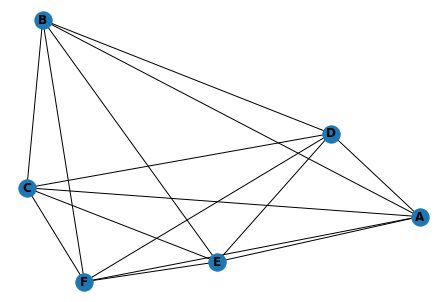

In [21]:
# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [22]:
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### cсоздаём колонию и запускаем её в созданный выше граф

In [23]:
solver = acopy.Solver(rho=.03, q=1)
colony = acopy.Colony(alpha=1, beta=3)

stats = acopy.plugins.StatsRecorder()
solver.add_plugin(stats)

timer = acopy.plugins.Timer()
solver.add_plugin(timer)

printout = acopy.plugins.Printout()
solver.add_plugin(printout)

# darwin = acopy.plugins.Darwin(sigma=.25)
# elite = acopy.plugins.EliteTracer(factor=2)
# periodic = acopy.plugins.PeriodicActionPlugin(period=100)
# PeriodicReset
# PheromoneFlip
# EarlyTerminationPlugin
# threshold = acopy.plugins.Threshold(threshold=1719)
# time_limit = acopy.plugins.TimeLimit(seconds=30)

In [24]:
tour = solver.solve(G, colony, limit=100)

Using 6 ants from Colony(alpha=1, beta=3)
Performing 100 iterations:
Iteration  Cost                 Solution
1          128.3                A B F E D C
2          60.3                 A B F D C E
3          46.6                 A F D C E B
11         46.599999999999994   A F D C E B
44         31.6                 A C E D F B
-------------------------------------------


In [25]:
display(tour.cost, tour.nodes, tour.path)

31.6

['F', 'B', 'A', 'C', 'E', 'D']

[('F', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'E'), ('E', 'D'), ('D', 'F')]

In [26]:
stats.data

{'solutions': {31.6	A,C,E,D,F,B,
  31.6	A,B,F,D,E,C,
  34.9	A,F,D,E,C,B,
  34.9	A,B,C,E,D,F,
  34.900000000000006	A,F,D,E,C,B,
  46.1	A,C,B,F,D,E,
  46.599999999999994	A,B,E,C,D,F,
  46.599999999999994	A,F,D,C,E,B,
  46.6	A,B,E,C,D,F,
  46.6	A,F,D,C,E,B,
  55.4	A,C,F,D,E,B,
  57.8	A,E,B,F,D,C,
  60.3	A,B,F,D,C,E,
  60.3	A,E,C,D,F,B,
  67.5	A,B,E,D,C,F,
  72.4	A,E,D,F,C,B,
  81.2	A,E,D,C,F,B,
  81.2	A,B,F,C,D,E,
  82.8	A,C,E,B,F,D,
  94.89999999999999	A,F,B,E,C,D,
  128.3	A,B,F,E,D,C,
  128.3	A,C,D,E,F,B,
  131.2	A,C,D,F,E,B,
  131.20000000000002	A,C,D,F,E,B,
  131.6	A,F,E,D,C,B,
  148.2	A,E,F,D,C,B}}

In [27]:
# stats.stats.keys()
# stats.stats.get('pheromone_levels')

In [28]:
aplot = acopy.utils.plot.Plotter(stats.stats)

In [29]:
aplot.extract_ant_distances()

[]

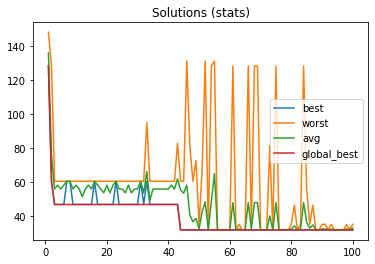

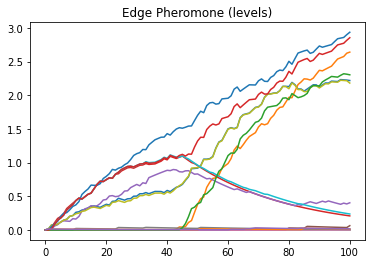

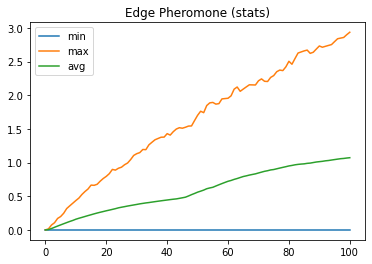

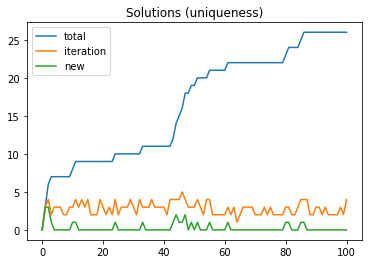

In [30]:
aplot.plot()